# Text reading and segmentation

In [1]:
import numpy as np
import jieba
import jieba.posseg as pseg

In [2]:
with open('romance_condor_heroes.txt', 'r') as f:
    data = list(f)

In [3]:
for s in data:
    print(len(s))

331551
263079
119938
240409


In [4]:
sentences = list()
for i in range(len(data)):
    sentences += data[i].replace(' ', '').split('。')
len(sentences)

21623

In [5]:
sentences

['“越女采蓮秋水畔，窄袖輕羅，暗露雙金釧',
 '照影摘花花似面，芳心只共絲爭亂',
 '雞尺溪頭風浪晚，霧重煙輕，不見來時伴',
 '隱隱歌聲歸棹遠，離愁引著江南岸',
 '”一陣輕柔婉轉的歌聲，飄在煙水蒙蒙的湖面上',
 '歌聲發自一艘小船之中，船里五個少女和歌嘻笑，蕩舟采蓮',
 '她們唱的曲子是北宋大詞人歐陽修所作的“蝶戀花”詞，寫的正是越女蓮的情景，雖只寥六十字，但季節、時辰、所在、景物以及越女的容貌、衣著、首飾、心情，無一不描繪得曆曆如見，下半闋更是寫景中有敘事，敘事中挾抒情，自近而遠，餘意不盡',
 '歐陽修在江南為官日久，吳山越水，柔情密意，盡皆融入長短句中',
 '宋人不論達官貴人，或是里巷小民，無不以唱詞為樂，是以柳永新詞一出，有井水處皆歌，而江南春岸折柳，秋湖采蓮，隨伴的往往便是歐詞',
 '時當南宋理宗年間，地處嘉興南湖',
 '節近中秋，荷葉漸殘，蓮肉飽實',
 '這一陣歌聲傳入湖邊一個道姑耳中',
 '她在一排柳樹下悄立已久，晚風拂動她杏黃色道袍的下擺，拂動她頸中所插拂塵的萬縷柔絲，心頭思潮起伏，當真亦是“芳心只共絲爭亂”',
 '只聽得歌聲漸漸遠去，唱的是歐陽修另一首“蝶戀花”詞，一陣風吹來，隱隱送來兩句：“風月無情人暗換，舊游如夢空腸斷……”歌聲甫歇，便是一陣格格嬌笑',
 '那道姑一聲長歎，提起左手，瞧著染滿了鮮血的手掌，喃喃自語：“那又有甚麼好笑？小妮子只是瞎唱，渾不解詞中相思之苦、惆悵之意',
 '”在那道姑身後十餘丈處，一個青袍長須的老者也是一悄直立不動，只有當“風月無情人暗換，舊游如夢空腸斷”那兩句傳到之時，發出一聲極輕極輕的歎息',
 '”小船在碧琉璃般的湖面上滑過，舟中五個少女中三人十五六歲上下，另外兩個都只九歲',
 '兩個幼女是中表之親，表姊姓程，單名一個英字，表妹姓陸，名無雙',
 '兩人相差半歲',
 '三個年長少女唱著歌兒，將小舟從荷葉叢中蕩將出來',
 '程英道：“表妹你瞧，這位老伯伯還在這兒',
 '”說著伸手指向垂柳下的一人',
 '那人滿頭亂發，胡須也是蓬蓬松松如刺猬一般，須發油光烏黑，照說年紀不大，可是滿臉皺紋深陷，卻似七八十歲老翁，身穿藍布直綴，頸中掛著個嬰兒所用的錦緞圍涎，圍涎上繡著幅花貓撲蝶圖，已然陳舊破爛',
 '陸無雙道：“這怪人在這兒坐了老半天啦，怎麼動也不動？”程英道：“別叫怪人，要叫

In [6]:
sent_seg = list()
jieba.set_dictionary('dict.txt.big')

for i in range(len(sentences)):
    s = sentences[i]
    sent_seg.append(list(jieba.cut(s)))
sent_seg = np.array(sent_seg)
sent_seg.shape, sent_seg[11111]

Building prefix dict from /media/warrents/6A085EA7085E7255/GoogleDriveSync/WarrenTS/Code/Code/Python2.7/IPython_Notebooks/MachineLearning/pecu_course/Text_mining_LSTM/dict.txt.big ...
Loading model from cache /tmp/jieba.u86847c3b15d467aa53d8311fcf6be389.cache
Loading model cost 1.226 seconds.
Prefix dict has been built succesfully.


((21623,),
 ['楊過',
  '緩緩',
  '又',
  '翻',
  '了',
  '個',
  '身',
  '，',
  '見',
  '郭靖',
  '仍',
  '無知覺',
  '，',
  '於是',
  '繼續',
  '發出',
  '低微',
  '鼾聲',
  '，',
  '一面',
  '走下',
  '床來'])

In [7]:
voca_count = dict()
for i in sent_seg:
    for j in i:
        if j in voca_count:
            voca_count[j] += 1
        else:
            voca_count[j] = 1
len(list(voca_count.keys()))

48171

# gensim

In [16]:
import gensim as g
model = g.models.Word2Vec(sent_seg, window=5, size=64, max_vocab_size=15000, min_count=1, iter=10)

In [17]:
len(model.wv.vocab)

10885

In [18]:
word2vec = dict()
vec = list()
vocas = list()
for voca in model.wv.vocab.keys():
    word2vec[voca] = model.wv.word_vec(voca)
    vocas.append(voca)
    vec.append(model.wv.word_vec(voca))
word2vec['<unknown>'] = np.zeros_like(word2vec['小心'])
word2vec['<go>'] = np.random.normal(0, 0.01, word2vec['小心'].shape).astype('float32')

np.save('word2vec_gensim', word2vec)

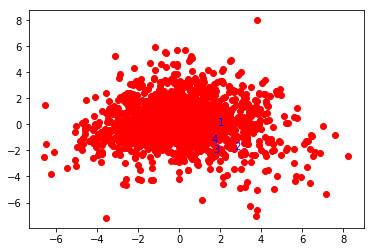

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=2)
vec_pca = pca.fit_transform(vec)
'''
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(vec_pca[:, 0], vec_pca[:, 1], vec_pca[:, 2], c='r')
vec_pca = list(vec_pca)
v11 = vec_pca[np.argwhere(v=='郭靖')[0][0]]
ax.text(x=v11[0], y=v11[1], z=v11[2], s='1', color='b')
v12 = vec_pca[np.argwhere(v=='黃蓉')[0][0]]
ax.text(x=v12[0], y=v12[1], z=v12[2], s='2', color='b')
v21 = vec_pca[np.argwhere(v=='楊過')[0][0]]
ax.text(x=v21[0], y=v21[1], z=v21[2], s='3', color='b')
v22 = vec_pca[np.argwhere(v=='小龍女')[0][0]]
ax.text(x=v22[0], y=v22[1], z=v22[2], s='4', color='b')
'''
plt.figure(0)
plt.scatter(vec_pca[:, 0], vec_pca[:, 1], c='r')
vec_pca = list(vec_pca)
v11 = vec_pca[np.argwhere(v=='郭靖')[0][0]]
plt.text(x=v11[0], y=v11[1], s='1', color='b')
v12 = vec_pca[np.argwhere(v=='黃蓉')[0][0]]
plt.text(x=v12[0], y=v12[1], s='2', color='b')
v21 = vec_pca[np.argwhere(v=='楊過')[0][0]]
plt.text(x=v21[0], y=v21[1], s='3', color='b')
v22 = vec_pca[np.argwhere(v=='小龍女')[0][0]]
plt.text(x=v22[0], y=v22[1], s='4', color='b')
plt.show()

In [12]:
v = np.array(vocas)
np.argwhere(v=='郭靖')[0][0], np.argwhere(v=='黃蓉')[0][0], np.argwhere(v=='楊過')[0][0], np.argwhere(v=='小龍女')[0][0]

(1928, 5968, 1024, 1537)

In [65]:
vec_pca[4590], vec_pca[869], vec_pca[6586]

(array([ 2.10387942,  0.92073788]),
 array([ 2.17869252,  1.63823731]),
 array([ 2.06679834,  1.40949253]))

In [14]:
np.mean(word2vec['小心']), np.std(word2vec['小心'])

(-0.04502365, 0.25478384)

In [15]:
word2vec['小心'].shape

(128,)

In [14]:
# romance vectors
romance_vec = list()
for i in range(len(sent_seg)):
    s = list()
    for j in range(len(sent_seg[i])):
        if sent_seg[i][j] in word2vec:
            vec = word2vec[sent_seg[i][j]]
        else:
            vec = word2vec['<unknown>']
        s.append(list(vec))
    romance_vec.append(s)
#romance_vec = np.array(romance_vec)
#np.save('romance_vec_gensim', romance_vec)

In [16]:
type(romance_vec), type(romance_vec[0]), type(romance_vec[0][0])

(list, list, list)

In [ ]:
#np.save('romance_vec_gensim', romance_vec)

In [132]:
romance_vec[0]

[[0.35327777,
  0.42540255,
  -1.1792471,
  -0.2073072,
  0.17414093,
  -0.22217552,
  0.21540347,
  0.79430574,
  -0.23101328,
  -1.1332172,
  0.48145586,
  0.39594498,
  1.2818429,
  1.011175,
  -0.2694321,
  0.13478364,
  -0.49467373,
  0.23584093,
  0.20773453,
  -0.93948096,
  -1.0265952,
  1.0649565,
  -0.40510046,
  0.8076812,
  -0.12689127,
  -0.16700189,
  -0.53598785,
  -0.83761132,
  -0.66464466,
  -0.046043538,
  -0.93101829,
  0.1240785,
  -1.2633531,
  -0.36658952,
  -0.011757703,
  0.26431945,
  0.19791074,
  -0.29506373,
  -0.70916831,
  0.64662516,
  -0.21659245,
  -1.175674,
  0.21538368,
  -0.032595325,
  -1.210835,
  0.20789143,
  0.73884231,
  0.61059922,
  -1.2715691,
  -0.10642699,
  0.55237609,
  -2.0887949,
  -0.38740841,
  -1.5036087,
  0.022331659,
  -0.12653223,
  -0.79133296,
  -0.36933833,
  -0.29760188,
  -0.33788794,
  -0.32653785,
  0.19774608,
  -0.85283375,
  -0.19896193,
  -0.53994143,
  -0.75379211,
  -0.81873965,
  -0.09514305,
  1.1981518,
  -0.40

In [15]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          15968        6377        9133          66         456        9198
Swap:         16302        1991       14311
